In [1]:
#필요한 라이브러리(패키지) import

import pandas as pd
import numpy as np
import csv

# 시각화 패키지
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

%matplotlib inline

In [2]:
# LOCALDATA의 체육시설 업종(https://www.localdata.go.kr/devcenter/dataDown.do?menuNo=20001) 16개 CSV파일 다운
## EXCEL에서 필요없는 칼럼 삭제(37개 -> 14개)
## CSV파일 읽음

df= pd.read_csv("/Users/seung/Desktop/standard_in_2020-12-31/csv/disclosed_sports_service.csv", encoding="utf-8")

In [3]:
df14 = df['폐업년도'].value_counts()
df14 = pd.DataFrame(df14)
df14.columns = ['폐업 수']
df15 = df14.T
df15

,2020,2019,2018,2017,2016
폐업 수,3122,2585,2529,1776,1464


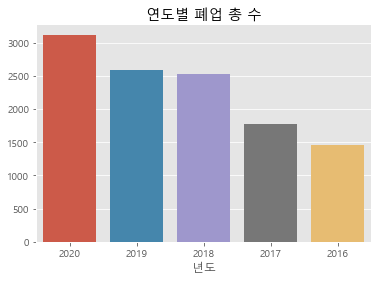

In [4]:
#년도별 폐업 갯수 막대그래프화

ax = sns.barplot(data=df15)
ax.set_xlabel('년도')
ax.set_title('연도별 폐업 총 수')

#저장 코드
fig = ax.get_figure()
fig.savefig("연도별 폐업 총 수.png")

plt.show()

In [5]:
#excel에서 년도별로 필터처리하여 csv로 저장

years2016_1= pd.read_csv("/Users/seung/Desktop/standard_in_2020-12-31/csv/2016_폐업_업종.csv", encoding="utf-8")
years2017_1= pd.read_csv("/Users/seung/Desktop/standard_in_2020-12-31/csv/2017_폐업_업종.csv", encoding="utf-8")
years2018_1= pd.read_csv("/Users/seung/Desktop/standard_in_2020-12-31/csv/2018_폐업_업종.csv", encoding="utf-8")
years2019_1= pd.read_csv("/Users/seung/Desktop/standard_in_2020-12-31/csv/2019_폐업_업종.csv", encoding="utf-8")
years2020_1= pd.read_csv("/Users/seung/Desktop/standard_in_2020-12-31/csv/2020_폐업_업종.csv", encoding="utf-8")

In [6]:
years2016_1.head(10)

,개방서비스명,인허가년도,인허가일자,영업상태명,폐업년도,폐업일자,위치,도로명전체주소,사업장명
0,수영장업,1997,19970927,폐업,2016,20160129,서울,"서울특별시 노원구 한글비석로 383 (중계동,(지층))",삼창타워스포츠
1,수영장업,1996,19960513,폐업,2016,20160720,서울,서울특별시 노원구 화랑로 653 (공릉동),이스턴캐슬수영장
2,수영장업,2004,20041008,폐업,2016,20160202,경기,경기도 용인시 수지구 문정로7번길 15 (풍덕천동),용인시 여성회관 YMCA 스포츠센터
3,수영장업,1993,19930322,폐업,2016,20160607,경기,경기도 평택시 평택3로 5 (합정동),새샘스포렉스
4,수영장업,2002,20021113,폐업,2016,20160316,경기,경기도 평택시 팽성읍 팽성송화로 63,제일스포츠센터
5,수영장업,2004,20040712,폐업,2016,20160418,경기,경기도 양평군 용문면 용문로164번길 42 (외2필지),SN 수련원
6,수영장업,1996,19961031,폐업,2016,20160603,경기,경기도 양평군 용문면 상광길 23-6,광탄레져파크
7,수영장업,2004,20040520,폐업,2016,20161123,서울,"서울특별시 광진구 아차산로78길 44, 지하2층 6호 (광장동, 크레스코빌딩)",포슬렌챌린지키즈수영장
8,수영장업,1995,19950919,폐업,2016,20160615,서울,서울특별시 동대문구 망우로 123 (휘경동),우창실내수영장
9,수영장업,2015,20150908,폐업,2016,20161107,서울,"서울특별시 도봉구 덕릉로63가길 61, 3층 (창동, 창동대우아파트 상가)",대우스포츠센터


In [7]:
years2016= years2016_1.drop(['영업상태명'],axis=1)
years2017= years2017_1.drop(['영업상태명'],axis=1)
years2018= years2018_1.drop(['영업상태명'],axis=1)
years2019= years2019_1.drop(['영업상태명'],axis=1)
years2020= years2020_1.drop(['영업상태명'],axis=1)

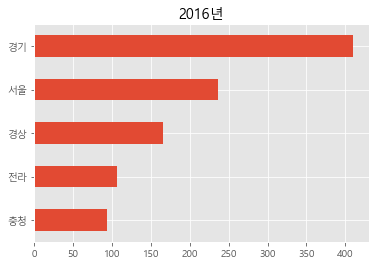

In [8]:
YEAR2016 = years2016['위치'].value_counts(ascending=True).tail(5)

YEAR2016.plot.barh(title='2016년')

# use format='svg' or 'pdf' for vectorial pictures
plt.savefig(('2016년 지역별 폐업 수.png'), dpi=300, format='png', bbox_inches='tight') 

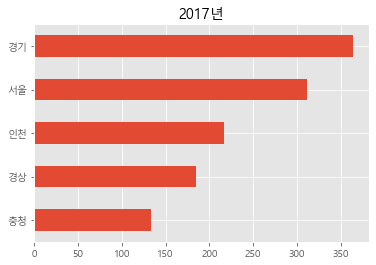

In [9]:
YEAR2017 = years2017['위치'].value_counts(ascending=True).tail(5)

YEAR2017.plot.barh(title='2017년')

# use format='svg' or 'pdf' for vectorial pictures
plt.savefig(('2017년 지역별 폐업 수.png'), dpi=300, format='png', bbox_inches='tight') 

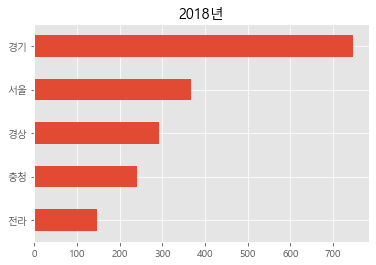

In [10]:
YEAR2018 = years2018['위치'].value_counts(ascending=True).tail(5)

YEAR2018.plot.barh(title='2018년')

# use format='svg' or 'pdf' for vectorial pictures
plt.savefig(('2018년 지역별 폐업 수.png'), dpi=300, format='png', bbox_inches='tight') 

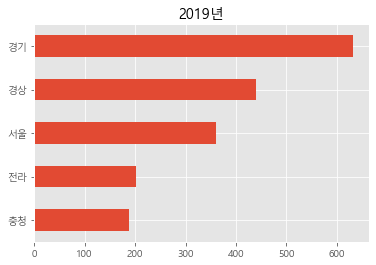

In [11]:
YEAR2019 = years2019['위치'].value_counts(ascending=True).tail(5)

YEAR2019.plot.barh(title='2019년')

# use format='svg' or 'pdf' for vectorial pictures
plt.savefig(('2019년 지역별 폐업 수.png'), dpi=300, format='png', bbox_inches='tight') 

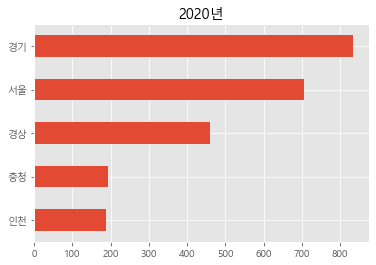

In [12]:
YEAR2020 = years2020['위치'].value_counts(ascending=True).tail(5)

YEAR2020.plot.barh(title='2020년')

# use format='svg' or 'pdf' for vectorial pictures
plt.savefig(('2020년 지역별 폐업 수.png'), dpi=300, format='png', bbox_inches='tight') 

In [13]:
# 2016년 폐업 수 1위 경기도, 2위 서울, 3위 경상도
# 1위~3위에서 어떤 체육 시설 폐업 갯수가 많은 지 조사 및 그래프화

## 2016년 1위 경기도
## 당구장업이 망한 갯수가 제일 많고, 체육도장업 및 골프연습장업이 2위, 3위를 함

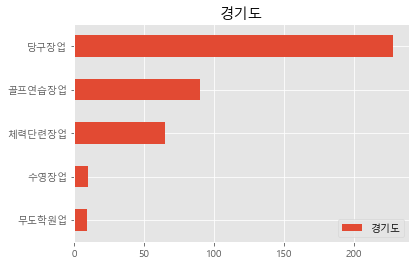

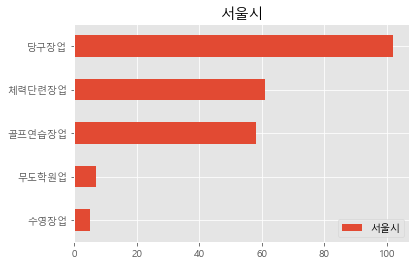

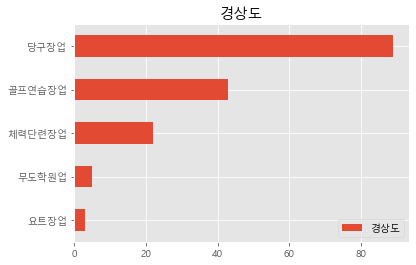

In [14]:
#2016년도 각 지역별에 따른 조회 및 병합

gyeonggi = (years2016['위치']=='경기')
seoul = (years2016['위치']=='서울')
gyeongsang = (years2016['위치']=='경상')

gyeonggi2016 = years2016.loc[gyeonggi]
seoul2016 = years2016.loc[seoul]
gyeongsang2016 = years2016.loc[gyeongsang]

## 2016년 1위 경기도
## 1위 당구장업, 2위 체육도장업, 3위 골프연습장업

GG2016 = gyeonggi2016['개방서비스명'].value_counts(ascending=True).tail(5)
SO2016 = seoul2016['개방서비스명'].value_counts(ascending=True).tail(5)
GS2016 = gyeongsang2016['개방서비스명'].value_counts(ascending=True).tail(5)

G2016G = pd.DataFrame(GG2016)
S2016O = pd.DataFrame(SO2016)
G2016S = pd.DataFrame(GS2016)

G2016G.columns=['경기도']
S2016O.columns=['서울시']
G2016S.columns=['경상도']

G2016G.plot.barh(title='경기도')
S2016O.plot.barh(title='서울시')
G2016S.plot.barh(title='경상도')


# use format='svg' or 'pdf' for vectorial pictures
plt.savefig(('2016년 각 지역 별 체육시설 폐업 수.png'), dpi=300, format='png', bbox_inches='tight') 

#### 3개 나눠진 그래프 한 개로 통합해야됨####

In [15]:
# 2017년 폐업 수 1위 경기도, 2위 서울, 3위 경상도
# 1위~3위에서 어떤 체육 시설 폐업 갯수가 많은 지 조사 및 그래프화

## 2016년 1위 경기도
## 당구장업이 망한 갯수가 제일 많고, 체육도장업 및 골프연습장업이 2위, 3위를 함

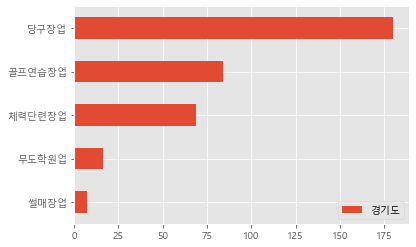

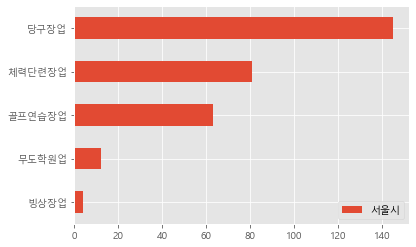

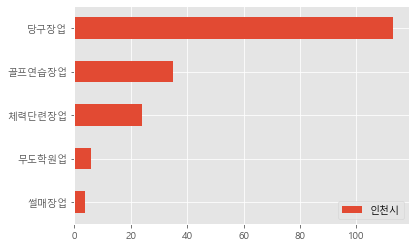

In [28]:
#2017년도 각 지역별에 따른 조회 및 병합

gyeonggi = (years2017['위치']=='경기')
seoul = (years2017['위치']=='서울')
incheon = (years2017['위치']=='인천')

gyeonggi2017 = years2017.loc[gyeonggi]
seoul2017 = years2017.loc[seoul]
incheon2017 = years2017.loc[incheon]


## 2017년 1위 경기도
## 1위 당구장업, 2위 체육도장업, 3위 골프연습장업

GG2017 = gyeonggi2017['개방서비스명'].value_counts(ascending=True).tail(5)
SO2017 = seoul2017['개방서비스명'].value_counts(ascending=True).tail(5)
IC2017 = incheon2017['개방서비스명'].value_counts(ascending=True).tail(5)

G2017G = pd.DataFrame(GG2017)
S2017O = pd.DataFrame(SO2017)
I2017C = pd.DataFrame(GS2017)

G2017G.columns=['경기도']
S2017O.columns=['서울시']
I2017C.columns=['인천시']

G2017G.plot.barh()
S2017O.plot.barh()
I2017C.plot.barh()

In [17]:
# 2018년 폐업 수 1위 경기도, 2위 서울, 3위 경상도
# 1위~3위에서 어떤 체육 시설 폐업 갯수가 많은 지 조사 및 그래프화

## 2018년 1위 경기도
## 당구장업이 망한 갯수가 제일 많고, 체육도장업 및 골프연습장업이 2위, 3위를 함

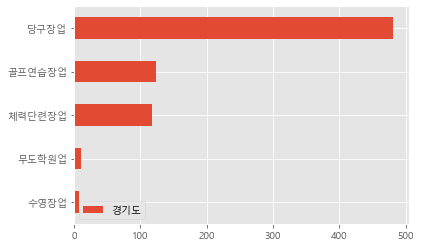

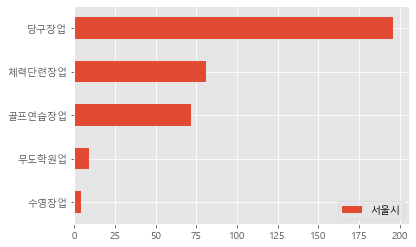

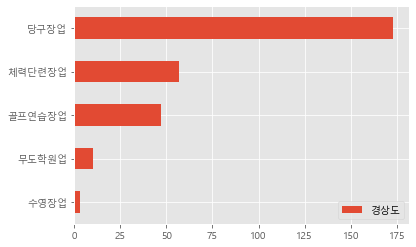

In [18]:
#2018년도 각 지역별에 따른 조회 및 병합

gyeonggi = (years2018['위치']=='경기')
seoul = (years2018['위치']=='서울')
gyeongsang = (years2018['위치']=='경상')

gyeonggi2018 = years2018.loc[gyeonggi]
seoul2018 = years2018.loc[seoul]
gyeongsang2018 = years2018.loc[gyeongsang]


## 2018년 1위 경기도
## 1위 당구장업, 2위 체육도장업, 3위 골프연습장업

GG2018 = gyeonggi2018['개방서비스명'].value_counts(ascending=True).tail(5)
SO2018 = seoul2018['개방서비스명'].value_counts(ascending=True).tail(5)
GS2018 = gyeongsang2018['개방서비스명'].value_counts(ascending=True).tail(5)

G2018G = pd.DataFrame(GG2018)
S2018O = pd.DataFrame(SO2018)
G2018S = pd.DataFrame(GS2018)

G2018G.columns=['경기도']
S2018O.columns=['서울시']
G2018S.columns=['경상도']

G2018G.plot.barh()
S2018O.plot.barh()
G2018S.plot.barh()
# 2017년 폐업 수 1위 경기도, 2위 서울, 3위 경상도
# 1위~3위에서 어떤 체육 시설 폐업 갯수가 많은 지 조사 및 그래프화

## 2016년 1위 경기도
## 당구장업이 망한 갯수가 제일 많고, 체육도장업 및 골프연습장업이 2위, 3위를 함G2018S.plot.barh()

In [19]:
# 2019년 폐업 수 1위 경기도, 2위 서울, 3위 경상도
# 1위~3위에서 어떤 체육 시설 폐업 갯수가 많은 지 조사 및 그래프화

## 2019년 1위 경기도
## 당구장업이 망한 갯수가 제일 많고, 체육도장업 및 골프연습장업이 2위, 3위를 함

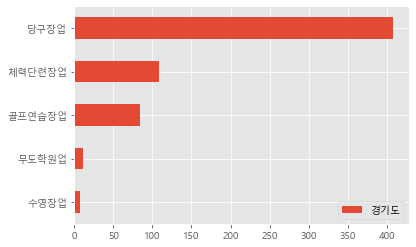

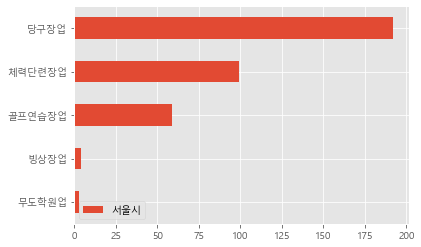

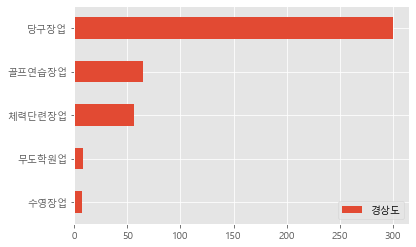

In [20]:
#2019년도 각 지역별에 따른 조회 및 병합

gyeonggi = (years2019['위치']=='경기')
seoul = (years2019['위치']=='서울')
gyeongsang = (years2019['위치']=='경상')

gyeonggi2019 = years2019.loc[gyeonggi]
seoul2019 = years2019.loc[seoul]
gyeongsang2019 = years2019.loc[gyeongsang]


## 2019년 1위 경기도
## 1위 당구장업, 2위 체육도장업, 3위 골프연습장업

GG2019 = gyeonggi2019['개방서비스명'].value_counts(ascending=True).tail(5)
SO2019 = seoul2019['개방서비스명'].value_counts(ascending=True).tail(5)
GS2019 = gyeongsang2019['개방서비스명'].value_counts(ascending=True).tail(5)

G2019G = pd.DataFrame(GG2019)
S2019O = pd.DataFrame(SO2019)
G2019S = pd.DataFrame(GS2019)

G2019G.columns=['경기도']
S2019O.columns=['서울시']
G2019S.columns=['경상도']

G2019G.plot.barh()
S2019O.plot.barh()
G2019S.plot.barh()

In [21]:
# 2020년 폐업 수 1위 경기도, 2위 서울, 3위 경상도
# 1위~3위에서 어떤 체육 시설 폐업 갯수가 많은 지 조사 및 그래프화

## 2020년 1위 경기도
## 당구장업이 망한 갯수가 제일 많고, 체육도장업 및 골프연습장업이 2위, 3위를 함

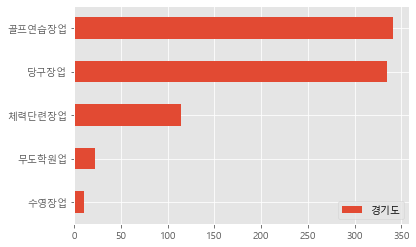

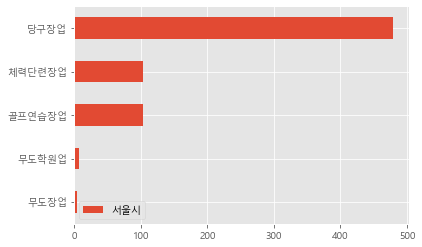

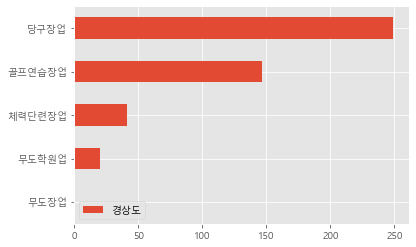

In [22]:
#2020년도 각 지역별에 따른 조회 및 병합

gyeonggi = (years2020['위치']=='경기')
seoul = (years2020['위치']=='서울')
gyeongsang = (years2020['위치']=='경상')

gyeonggi2020 = years2020.loc[gyeonggi]
seoul2020 = years2020.loc[seoul]
gyeongsang2020 = years2020.loc[gyeongsang]


## 2020년 1위 경기도
## 1위 당구장업, 2위 체육도장업, 3위 골프연습장업

GG2020 = gyeonggi2020['개방서비스명'].value_counts(ascending=True).tail(5)
SO2020 = seoul2020['개방서비스명'].value_counts(ascending=True).tail(5)
GS2020 = gyeongsang2020['개방서비스명'].value_counts(ascending=True).tail(5)

G2020G = pd.DataFrame(GG2020)
S2020O = pd.DataFrame(SO2020)
G2020S = pd.DataFrame(GS2020)

G2020G.columns=['경기도']
S2020O.columns=['서울시']
G2020S.columns=['경상도']

G2020G.plot.barh()
S2020O.plot.barh()
G2020S.plot.barh()

In [23]:
# 행,열 변환 .T 입력하면 됨

GYEONGGI2017 = G2017G.T
SEOUL2017 = S2017O.T
GYEONGSANG2017 = G2017S.T

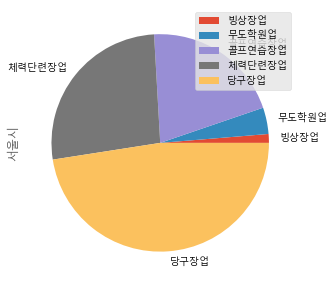

In [26]:
S2017O.plot.pie(y='서울시',figsize=(5,5))